In [27]:
import tensorflow as tf

In [28]:
batch_size = 128
num_classes = 10 #숫자 10가지
epochs = 100

In [29]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train[0])
#print(y_train[0]) - y_train은 결과값
x_train, x_test = x_train / 255.0, x_test / 255.0
#print(x_train[0])
#0부터 255값들을 나눠서 1보다 작은 값들을 실수로 출력

In [30]:
print('x_train.shape', x_train.shape) #가로세로 28
print(x_train.shape[0], 'train samples') #6만개의 trian
print(x_test.shape[0], 'test samples') #1만개의 test

x_train.shape (60000, 28, 28)
60000 train samples
10000 test samples


In [31]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
#one hot 구조로 되어있음.
y_test =  tf.keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0])-1과 0으로 이진으로 표현되어있음.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [40]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [41]:
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only=True)
#digits~이름으로 체크포인트 저장함.
monitor_val_lose  = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5)#5번만 참고 stop

In [42]:
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[monitor_val_lose,modelCheckpoint])

Epoch 1/100
469/469 [==============================] - 4s 6ms/step - loss: 0.3991 - accuracy: 0.8859 - val_loss: 0.1928 - val_accuracy: 0.9443
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1895 - accuracy: 0.9453 - val_loss: 0.1333 - val_accuracy: 0.9611
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1413 - accuracy: 0.9591 - val_loss: 0.1123 - val_accuracy: 0.9671
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1172 - accuracy: 0.9664 - val_loss: 0.0936 - val_accuracy: 0.9732
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0993 - accuracy: 0.9707 - val_loss: 0.0839 - val_accuracy: 0.9743
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0875 - accuracy: 0.9736 - val_loss: 0.0804 - val_accuracy: 0.9755
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.0769 - val_accuracy: 0.9759

313/313 - 0s - loss: 0.0733 - accuracy: 0.9803


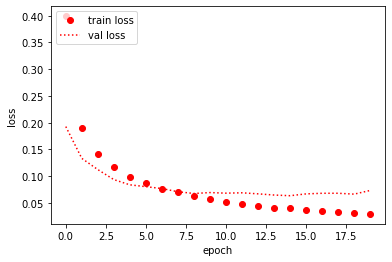

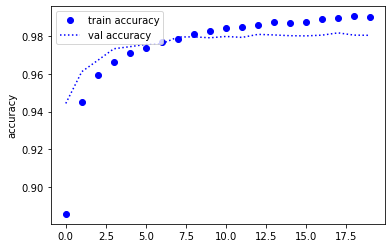

In [43]:
#그래프 나타내기
model.evaluate(x_test,y_test,verbose=2)
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train loss')
loss_ax.plot(history.history['val_loss'],'r:',label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'],'bo',label='train accuracy')
acc_ax.plot(history.history['val_accuracy'],'b:',label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()


In [44]:
#예측모델
import numpy as np
selected_digit = 0

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)
#print에서 7이 압도적으로 큰숫자로 보임

[[6.9546613e-10 1.1652171e-10 2.1179050e-08 4.8444137e-05 5.8657574e-14
  3.2029479e-09 8.9260434e-14 9.9995077e-01 2.7146708e-08 8.3658466e-07]] 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


[6.9546613e-10, 1.1652171e-10, 2.117905e-08, 4.8444137e-05, 5.8657574e-14, 3.202948e-09, 8.9260434e-14, 0.99995077, 2.7146708e-08, 8.3658466e-07]


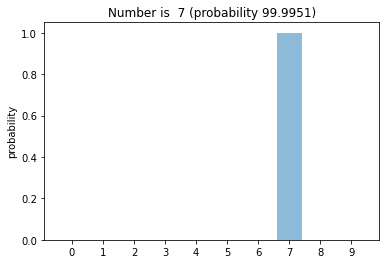

In [51]:
digits = ('0','1','2','3','4','5','6','7','8','9')
y_pos = np.arange(len(digits))
performance = [val for val in result[0]]
print(performance)
result_probability = performance[result_number] #여기선 7
plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt.xticks(y_pos,digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)'% (result_number, result_probability*100))

plt.show()

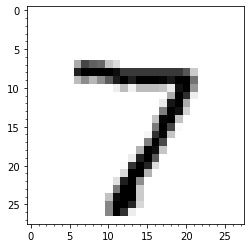

In [53]:
#숫자를 그림으로 표현
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

major_ticks = np.arange(0,29,5)
minor_ticks = np.arange(0,29,1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor =True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.imshow(x_test[selected_digit], cmap=plt.cm.binary)

plt.show()


In [54]:
print(x_test[selected_digit])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    